In [49]:
import math

import matplotlib.pyplot as plt
import numpy as np

PointArray(array([Point(1, 1), Point(1, 6), Point(8, 3), Point(3, 4), Point(5, 5),
       Point(8, 9)], dtype=object))
#0 Point(1, 1): infinite
#1 Point(1, 6): infinite
#2 Point(8, 3): infinite
#3 Point(3, 4): 9
#4 Point(5, 5): 17
#5 Point(8, 9): infinite


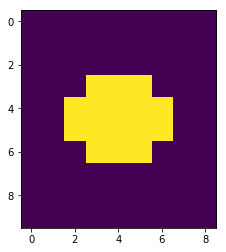

In [114]:
class Point(object):
    vec_calc_dists = np.vectorize(Point.calc_dist)
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return "Point(%d, %d)" % (self.x, self.y)

    @staticmethod
    def calc_dist(p1, p2):
        return abs(p1.x - p2.x) + abs(p1.y - p2.y)

class PointArray(object):
    def __init__(self, points):
        self.points = points
        self.xmax = self._xmax()
        self.ymax = self._ymax()
        self.grid = None
        self.grid2 = None
    
    def __repr__(self):
        return "PointArray("+self.points.__repr__()+")"
    
    def _xmax(self):
        return np.array([p.x for p in self.points]).max()
    
    def _ymax(self):
        return np.array([p.y for p in self.points]).max()
    
    def build_grid(self, xpad=0, ypad=0):
        nx = self.xmax + 1 + xpad
        ny = self.ymax + 1 + ypad
        self.grid = np.ndarray((ny, nx), dtype=int)
        self.grid[:] = -1
        for j in range(ny):
            for i in range(nx):
                p = Point(i, j)
                d = Point.vec_calc_dists(self.points, p)
                k = d.argmin()
                dmin = d[k]
                if len(d[d==dmin]) == 1:
                    self.grid[j,i] = k
                    
    def build_grid2(self, xpad=0, ypad=0):
        nx = self.xmax + 1 + xpad
        ny = self.ymax + 1 + ypad
        self.grid2 = np.ndarray((ny, nx), dtype=int)
        for j in range(ny):
            for i in range(nx):
                p = Point(i, j)
                d = Point.vec_calc_dists(self.points, p)
                self.grid2[j,i] = d.sum()
        
    def find_max_area(self):
        inf = set(np.unique(np.concatenate((self.grid[0,:], self.grid[-1,:], self.grid[:,0], self.grid[:,-1]))))
        max_area = 0
        #print(self.points)
        for k, p in enumerate(self.points):
            if k in inf:
                print("#%d %s: infinite" % (k, p))
            else: 
                area = (self.grid == k).sum()
                print("#%d %s: %d" % (k, p, area))
                if area > max_area:
                    max_area = area
        return max_area

    @staticmethod
    def from_file(filename):
        out = []
        with open(filename, "r") as fh:
            for line in fh:
                #print(line)
                x, y = line.rstrip().split(", ")
                out.append(Point(int(x), int(y)))
        return PointArray(np.array(out))
    
testpoints = PointArray.from_file("test.txt")
print(testpoints)
testpoints.build_grid()
plt.imshow(testpoints.grid)
testpoints.find_max_area()
testpoints.build_grid2()
plt.imshow((testpoints.grid2 < 32))

PointArray(array([Point(337, 150), Point(198, 248), Point(335, 161), Point(111, 138),
       Point(109, 48), Point(261, 155), Point(245, 130), Point(346, 43),
       Point(355, 59), Point(53, 309), Point(59, 189), Point(325, 197),
       Point(93, 84), Point(194, 315), Point(71, 241), Point(193, 81),
       Point(166, 187), Point(208, 95), Point(45, 147), Point(318, 222),
       Point(338, 354), Point(293, 242), Point(240, 105), Point(284, 62),
       Point(46, 103), Point(59, 259), Point(279, 205), Point(57, 102),
       Point(77, 72), Point(227, 194), Point(284, 279), Point(300, 45),
       Point(168, 42), Point(302, 99), Point(338, 148), Point(300, 316),
       Point(296, 229), Point(293, 359), Point(175, 208), Point(86, 147),
       Point(91, 261), Point(188, 155), Point(257, 292), Point(268, 215),
       Point(257, 288), Point(165, 333), Point(131, 322), Point(264, 313),
       Point(236, 130), Point(98, 60)], dtype=object))


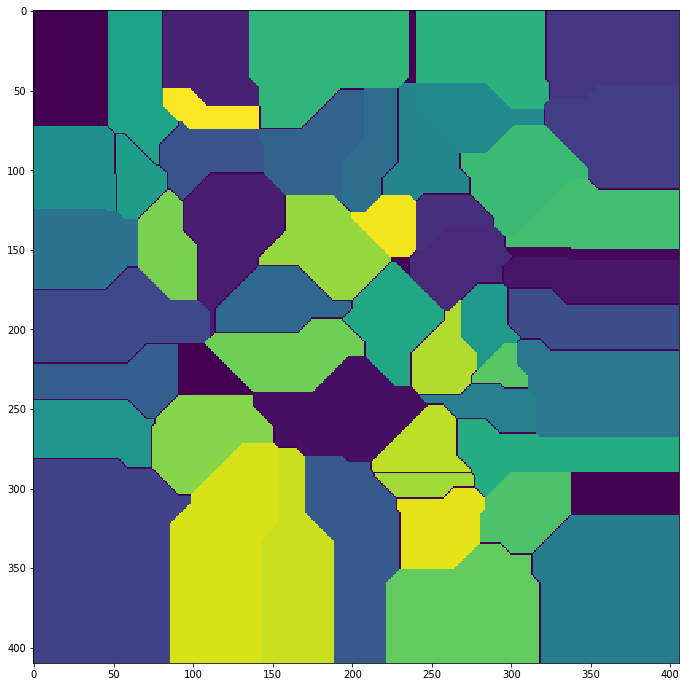

#0 Point(337, 150): infinite
#1 Point(198, 248): 4284
#2 Point(335, 161): infinite
#3 Point(111, 138): 3695
#4 Point(109, 48): infinite
#5 Point(261, 155): 2222
#6 Point(245, 130): 997
#7 Point(346, 43): infinite
#8 Point(355, 59): infinite
#9 Point(53, 309): infinite
#10 Point(59, 189): infinite
#11 Point(325, 197): infinite
#12 Point(93, 84): 1970
#13 Point(194, 315): infinite
#14 Point(71, 241): infinite
#15 Point(193, 81): 2821
#16 Point(166, 187): 2363
#17 Point(208, 95): 1836
#18 Point(45, 147): infinite
#19 Point(318, 222): infinite
#20 Point(338, 354): infinite
#21 Point(293, 242): 1319
#22 Point(240, 105): 2070
#23 Point(284, 62): 2191
#24 Point(46, 103): infinite
#25 Point(59, 259): infinite
#26 Point(279, 205): 1240
#27 Point(57, 102): 1147
#28 Point(77, 72): infinite
#29 Point(227, 194): 2649
#30 Point(284, 279): infinite
#31 Point(300, 45): infinite
#32 Point(168, 42): infinite
#33 Point(302, 99): 3212
#34 Point(338, 148): infinite
#35 Point(300, 316): 2284
#36 Point(296, 

4284

In [115]:
inputpoints = PointArray.from_file("input.txt")
print(inputpoints)
inputpoints.build_grid(xpad=50, ypad=50)
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(inputpoints.grid)
plt.show()
inputpoints.find_max_area()

In [116]:
inputpoints.build_grid2()

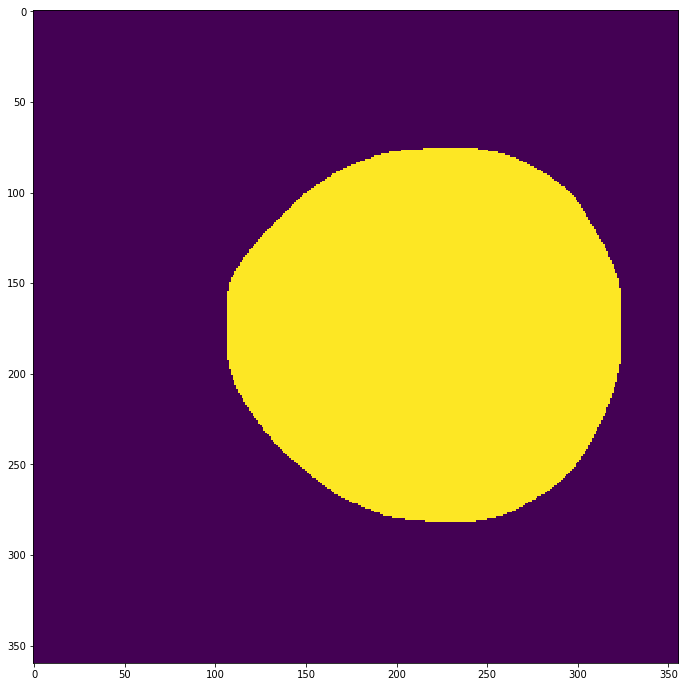

In [119]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow((inputpoints.grid2 < 10000))

In [120]:
(inputpoints.grid2 < 10000).sum()

35490

[[ 0  0  0  0  0 -1  2  2  2  2  2  2]
 [ 0  0  0  0  0 -1  2  2  2  2  2  2]
 [ 0  0  0  3  3  4  2  2  2  2  2  2]
 [ 0  0  3  3  3  4  2  2  2  2  2  2]
 [-1 -1  3  3  3  4  4  2  2  2  2  2]
 [ 1  1 -1  3  4  4  4  4  2  2  2  2]
 [ 1  1  1 -1  4  4  4  4 -1 -1 -1 -1]
 [ 1  1  1 -1  4  4  4  5  5  5  5  5]
 [ 1  1  1 -1  4  4  5  5  5  5  5  5]
 [ 1  1  1 -1  5  5  5  5  5  5  5  5]
 [ 1  1  1 -1  5  5  5  5  5  5  5  5]]


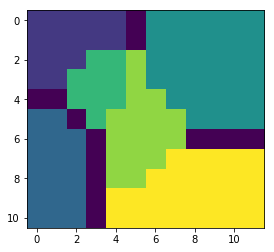

In [51]:
print(grid)
plt.imshow(grid)